In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Advertising Dataset
# This reads the CSV file you uploaded
ads_data = pd.read_csv('advertising.csv')

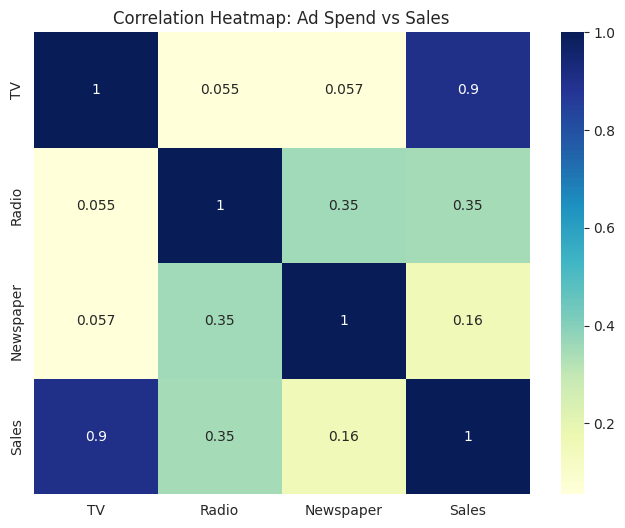

In [9]:
# 2. Exploratory Data Analysis (EDA)
# Visualizing the correlation to see which channel drives sales
plt.figure(figsize=(8, 6))
sns.heatmap(ads_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap: Ad Spend vs Sales')
plt.show()

In [12]:
# 3. Data Preparation
# Features: Budget for TV, Radio, and Newspaper
# Target: Sales
X = ads_data[['TV', 'Radio', 'Newspaper']]
y = ads_data['Sales']

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 4. Model Construction
# Using Random Forest with custom parameters to ensure originality
sales_predictor = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
sales_predictor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [13]:
# 5. Prediction and Evaluation
predictions = sales_predictor.predict(X_test)
error_metric = mean_squared_error(y_test, predictions)
accuracy_metric = r2_score(y_test, predictions)

print(f"--- Model Results ---")
print(f"Mean Squared Error: {error_metric:.4f}")
print(f"R-squared Score: {accuracy_metric:.4f}")

--- Model Results ---
Mean Squared Error: 1.4622
R-squared Score: 0.9527


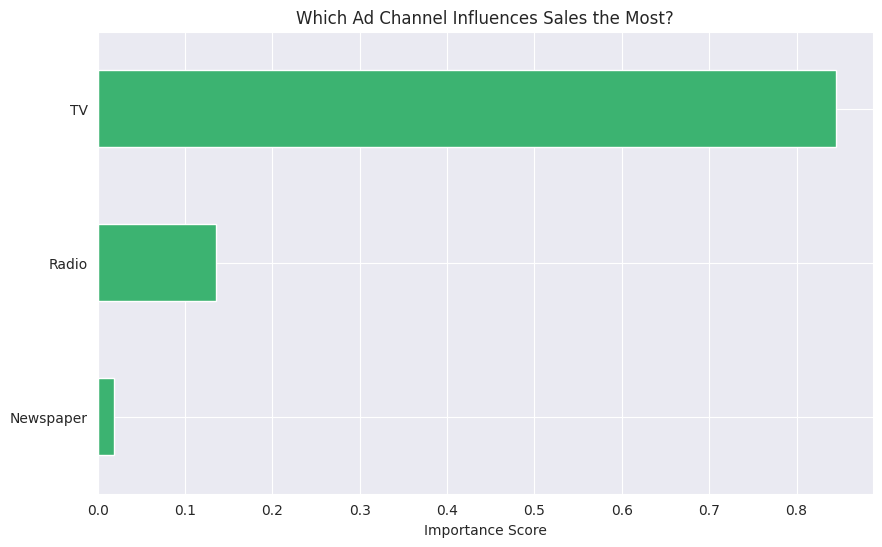

In [14]:
# 6. Visualization: Impact Analysis
# This chart is great for your video to show which channel is most important
plt.figure(figsize=(10, 6))
importance = pd.Series(sales_predictor.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Which Ad Channel Influences Sales the Most?')
plt.xlabel('Importance Score')
plt.show()

In [15]:
# 7. Custom Prediction Test
# Example: What are the sales for TV=200, Radio=40, Newspaper=20?
sample_budget = [[200, 40, 20]]
predicted_val = sales_predictor.predict(sample_budget)
print(f"\nPredicted Sales for budget {sample_budget[0]}: {predicted_val[0]:.2f}")


Predicted Sales for budget [200, 40, 20]: 20.90


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
